# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman.

### imports

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# set defaults for plotting
sns.set_context('poster')
sns.set_style('ticks')

### get data

In [3]:
df = pd.read_csv('../data/feelingOld.csv')
df.tail()

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0


### transform data

In [4]:
df.loc[:, 'diff'] = df.loc[:, 'oldBegin'] - df.loc[:, 'age']
df.tail()

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild,diff
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1,27
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2,1
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5,15
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3,0
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0,-1


### modelling

Linear Regression

In [5]:
slope, intercept, r, p, se = stats.linregress(df.loc[:, 'age'],
                                              df.loc[:, 'diff'])

print('alpha=%.2f, beta=%.2f'%(intercept, slope))

alpha=28.39, beta=-0.46


Predictions for the age range of 0 to 100

In [6]:
X = range(100)
y = [intercept + slope * x for x in X]

In [7]:
print(X,y)

range(0, 100) [28.393842249045505, 27.9300273906696, 27.466212532293696, 27.002397673917788, 26.538582815541883, 26.074767957165978, 25.610953098790073, 25.14713824041417, 24.68332338203826, 24.219508523662356, 23.75569366528645, 23.291878806910546, 22.82806394853464, 22.364249090158737, 21.90043423178283, 21.436619373406923, 20.97280451503102, 20.508989656655114, 20.045174798279206, 19.5813599399033, 19.117545081527396, 18.65373022315149, 18.189915364775587, 17.726100506399682, 17.262285648023777, 16.798470789647872, 16.334655931271964, 15.87084107289606, 15.407026214520155, 14.943211356144248, 14.479396497768343, 14.015581639392437, 13.551766781016532, 13.087951922640627, 12.62413706426472, 12.160322205888814, 11.69650734751291, 11.232692489137005, 10.7688776307611, 10.305062772385195, 9.841247914009287, 9.377433055633382, 8.913618197257478, 8.449803338881573, 7.985988480505668, 7.522173622129763, 7.058358763753855, 6.59454390537795, 6.1307290470020455, 5.666914188626141, 5.203099330

Find the age where the diff value is closest to zero

In [8]:
at_zero = (0 - intercept) / slope
at_zero

61.21805228161386

## visualization

Data

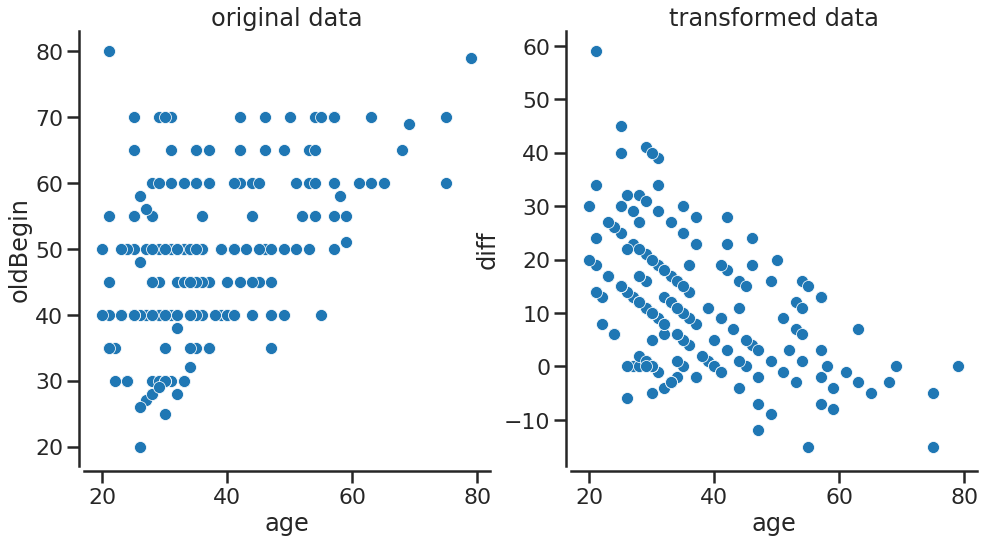

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot("age", "oldBegin", data=df, ax=ax1)
ax1.set_title('original data')
sns.scatterplot("age", "diff", data=df, ax=ax2)
ax2.set_title('transformed data')
sns.despine(offset=5)
plt.show()

Data and model

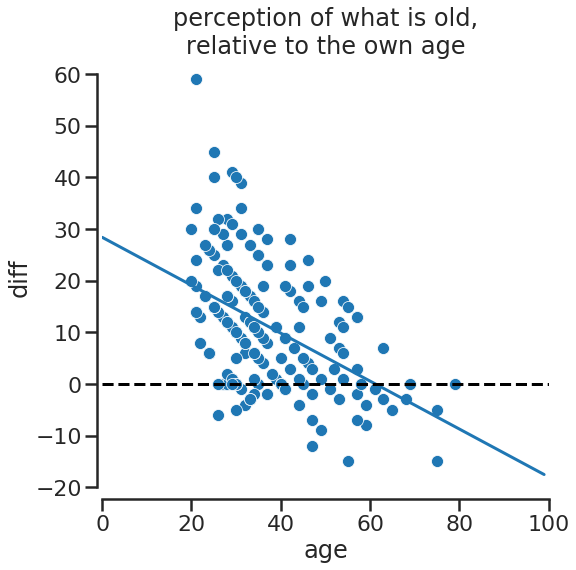

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# raw data
sns.scatterplot("age", "diff", data=df, ax=ax)
# predictions
ax.plot(X, y)

ax.set_xlim(0, 100)
ax.axhline(0, color='k', linestyle='dashed')
sns.despine(offset=5, trim=True)
plt.title('perception of what is old,\nrelative to the own age')
plt.show()

### making sense of the data

As the own age increses, the perception of what is old approaches one's own age. Around age {{ '%.0f'%at_zero }}, the average person percieves themselves as old.